In [6]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set() #setting the default seaborn style for our plots
import pandas as pd
from pandas import DataFrame
movies = pd.read_csv('tmdb-movies.csv')

In [7]:
movies.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [9]:
movies.isna().apply(pd.value_counts)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
False,10866.0,10856,10866.0,10866.0,10866.0,10866.0,10790,2936,10822,8042,...,10862,10866.0,10843,9836,10866.0,10866.0,10866.0,10866.0,10866.0,10866.0
True,NaN,10,NaN,NaN,NaN,NaN,76,7930,44,2824,...,4,NaN,23,1030,NaN,NaN,NaN,NaN,NaN,NaN


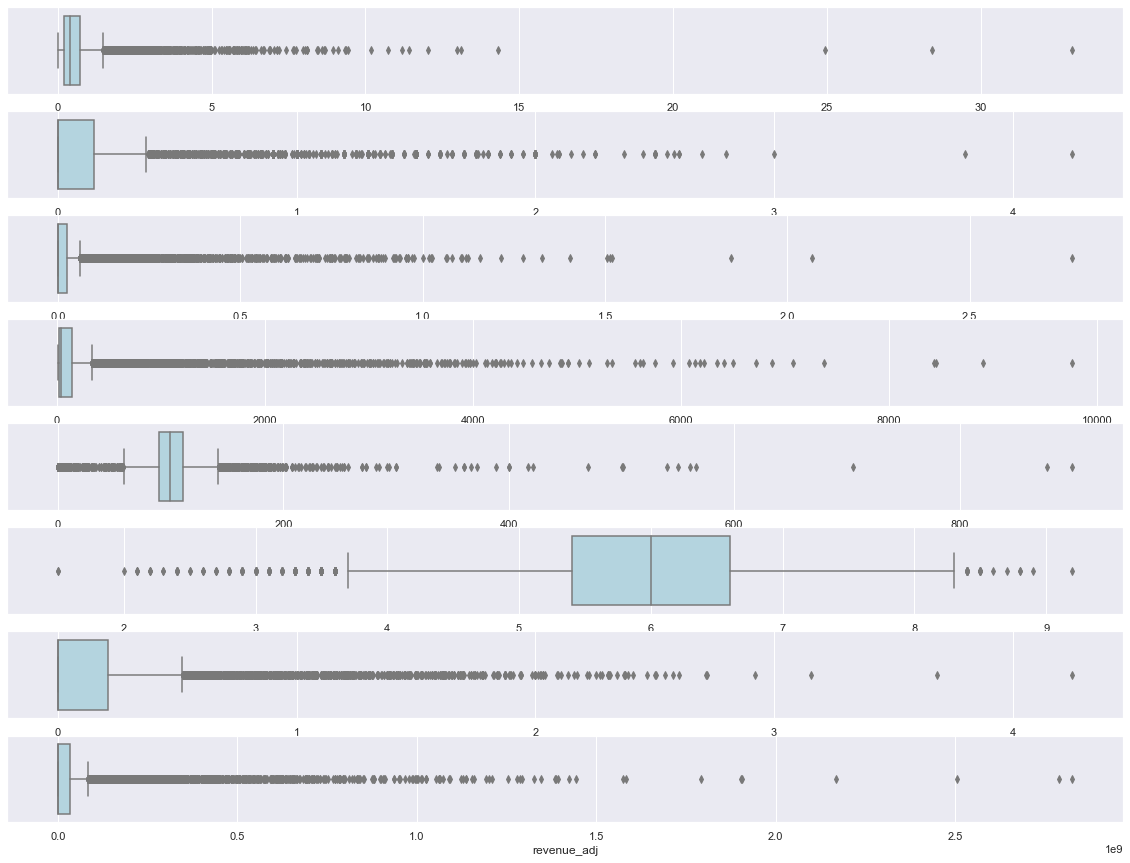

In [10]:
plt.figure(figsize= (20,15))
plt.subplot(8,1,1)
sns.boxplot(x= movies.popularity, color='lightblue')

plt.subplot(8,1,2)
sns.boxplot(x= movies.budget, color='lightblue')

plt.subplot(8,1,3)
sns.boxplot(x= movies.revenue, color='lightblue')

plt.subplot(8,1,4)
sns.boxplot(x= movies.vote_count, color='lightblue')

plt.subplot(8,1,5)
sns.boxplot(x= movies.runtime, color='lightblue')

plt.subplot(8,1,6)
sns.boxplot(x= movies.vote_average, color='lightblue')

plt.subplot(8,1,7)
sns.boxplot(x= movies.budget_adj, color='lightblue')

plt.subplot(8,1,8)
sns.boxplot(x= movies.revenue_adj, color='lightblue')
plt.show()

In [11]:
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10866.0,6.606418e+04,9.213014e+04,5.000000,10596.250000,20669.000000,7.561000e+04,4.178590e+05
popularity,10866.0,6.464410e-01,1.000185e+00,0.000065,0.207583,0.383856,7.138170e-01,3.298576e+01
budget,10866.0,1.462570e+07,3.091321e+07,0.000000,0.000000,0.000000,1.500000e+07,4.250000e+08
revenue,10866.0,3.982332e+07,1.170035e+08,0.000000,0.000000,0.000000,2.400000e+07,2.781506e+09
runtime,10866.0,1.020709e+02,3.138141e+01,0.000000,90.000000,99.000000,1.110000e+02,9.000000e+02
vote_count,10866.0,2.173897e+02,5.756191e+02,10.000000,17.000000,38.000000,1.457500e+02,9.767000e+03
vote_average,10866.0,5.974922e+00,9.351418e-01,1.500000,5.400000,6.000000,6.600000e+00,9.200000e+00
release_year,10866.0,2.001323e+03,1.281294e+01,1960.000000,1995.000000,2006.000000,2.011000e+03,2.015000e+03
budget_adj,10866.0,1.755104e+07,3.430616e+07,0.000000,0.000000,0.000000,2.085325e+07,4.250000e+08
revenue_adj,10866.0,5.136436e+07,1.446325e+08,0.000000,0.000000,0.000000,3.369710e+07,2.827124e+09


In [13]:
movies.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


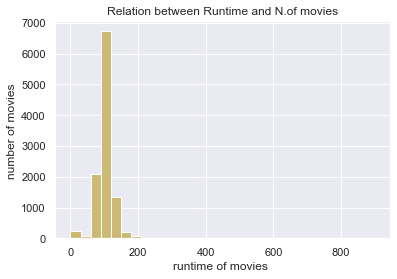

In [15]:
#plot relation between runtime and budget
#the mean is probably at 150 
plt.title("Relation between Runtime and N.of movies")
plt.xlabel("runtime of movies ")
plt.ylabel("number of movies ")
plt.hist(movies["runtime"],bins= 30,color="y" )
plt.show()

In [19]:
count = pd.Series(movies['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
count
#number of movies per genre

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64

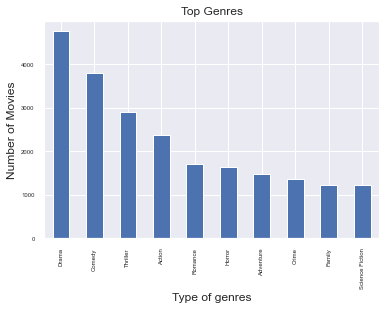

In [20]:
# Initialize the plot
diagram = count[:10].plot.bar(fontsize = 6)
# Set a title
diagram.set(title = 'Top Genres')
# x-label and y-label
diagram.set_xlabel('Type of genres')
diagram.set_ylabel('Number of Movies')
# Show the plot
plt.show()
#drama has the highest number of movies and science fiction has the lowest

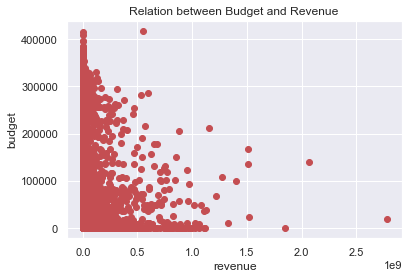

In [25]:
#plot relation between budget and revenue   
revenue = movies.iloc [:,4].values
budget =  movies.iloc[:,0].values 
plt.title("Relation between Budget and Revenue ")
plt.xlabel("revenue")
plt.ylabel("budget")
plt.scatter(revenue,budget , color = "r" )
#the figure is skewed at the left and there is low high revenues with high budget

In [24]:
revenue

array(["Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson",
       'Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman',
       'Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller',
       ...,
       'Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Zhzhyonov|Olga Aroseva|Lyubov Dobrzhanskaya',
       'Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|John Sebastian|Tadao Nakamaru',
       'Harold P. Warren|Tom Neyman|John Reynolds|Diane Mahree|Stephanie Nielson'],
      dtype=object)

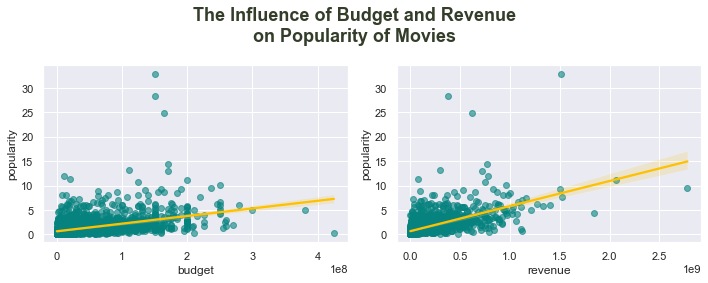

In [27]:
df_plot = movies[(movies['budget'] != 0) & (movies['revenue'] != 0)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.suptitle('The Influence of Budget and Revenue\non Popularity of Movies', fontsize=18, weight=600, color='#333d29')
for i, col in enumerate(['budget', 'revenue']):
    sns.regplot(data=df_plot, x=col, y='popularity',
                scatter_kws={"color": "#06837f", "alpha": 0.6}, line_kws={"color": "#fdc100"}, ax=axes[i])

plt.tight_layout()
#popularity is affected by budget and revenue

Text(0.5, 1.0, 'The Relationship Between Rating and Popularity')

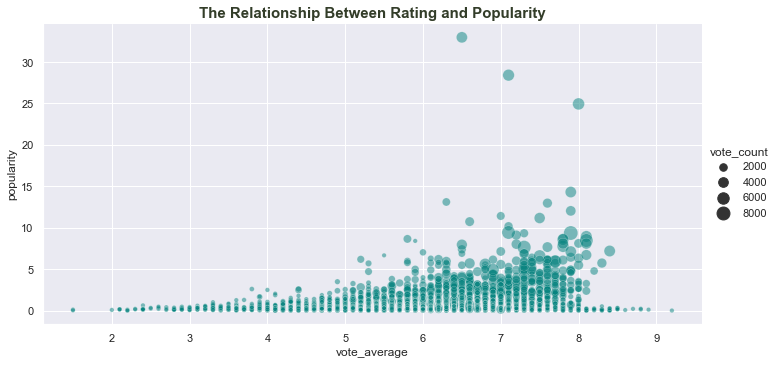

In [38]:
sns.relplot(data=movies, x='vote_average', y='popularity', size='vote_count',
            sizes=(20, 200), alpha=.5, aspect=2, color='#06837f')
plt.title('The Relationship Between Rating and Popularity', fontsize=15, weight=600, color='#333d29')
#when vote count increases popularity increases slowly also

<AxesSubplot:title={'center':'Correlation of Movie Features\n'}>

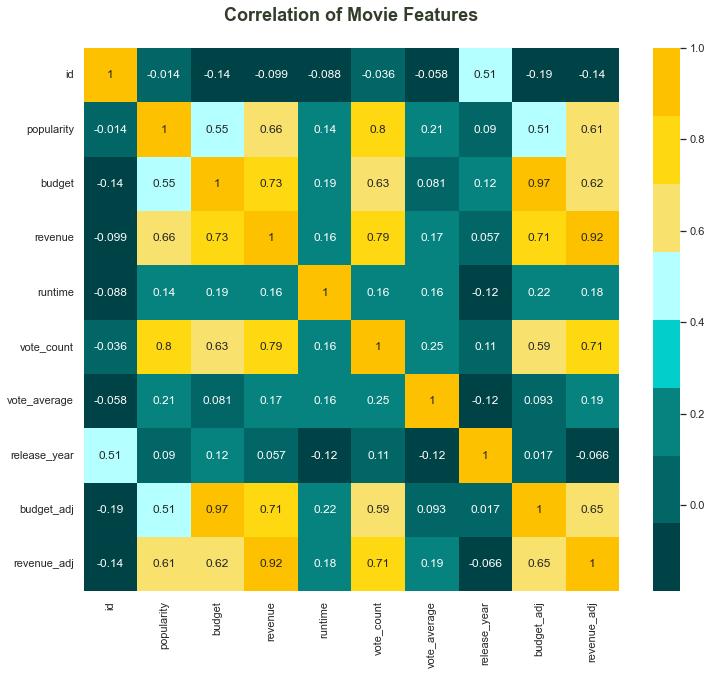

In [39]:
plt.figure(figsize=(12,10))
plt.title('Correlation of Movie Features\n', fontsize=18, weight=600, color='#333d29')
sns.heatmap(movies.corr(), annot=True, cmap=['#004346', '#036666', '#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811', '#fdc100'])